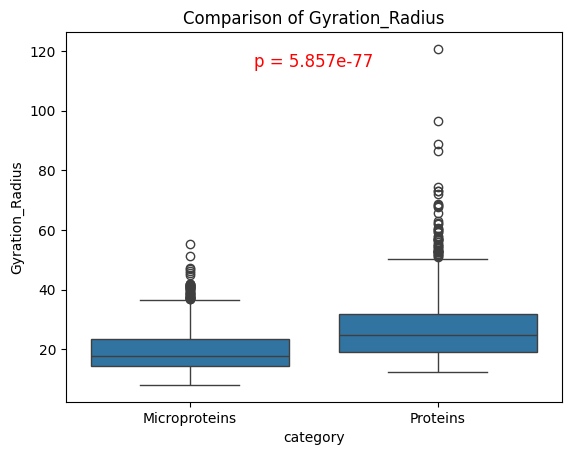

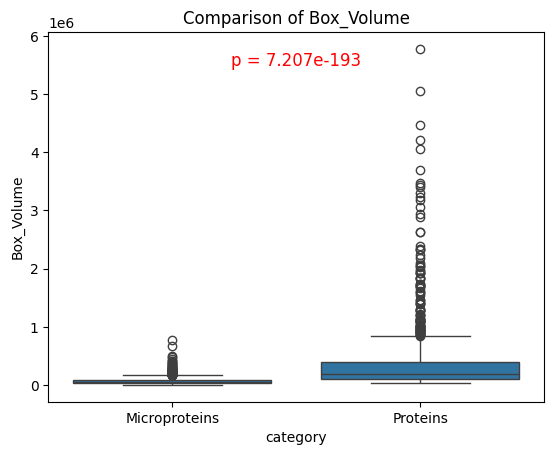

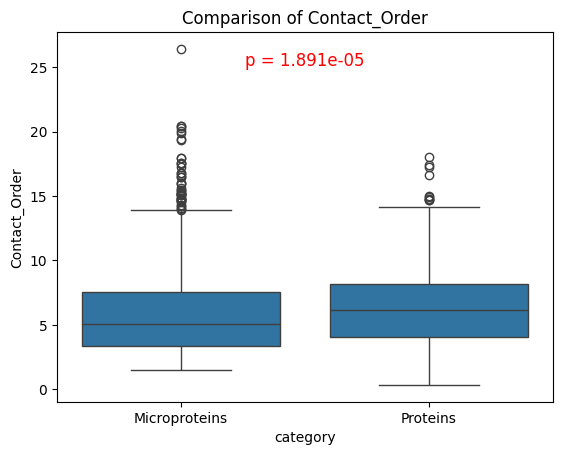

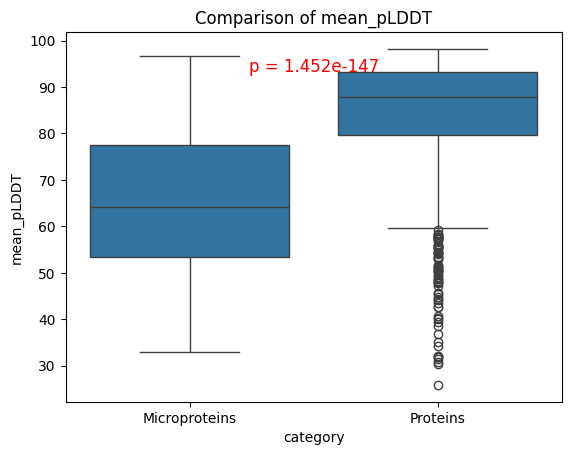

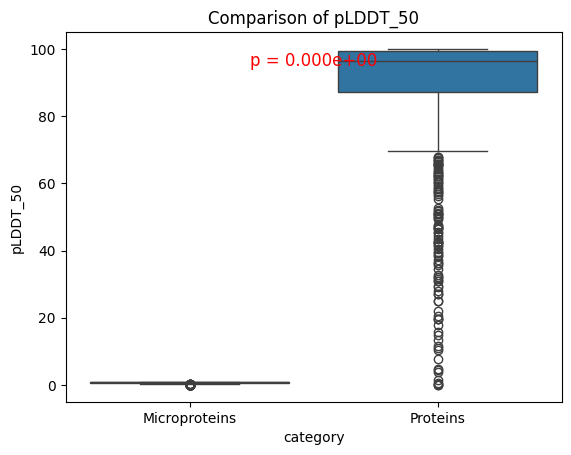

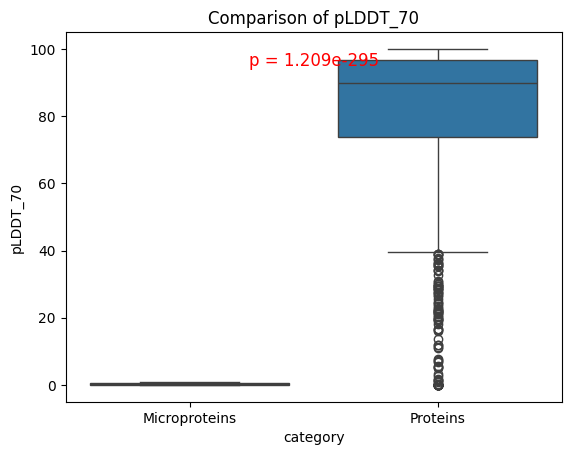

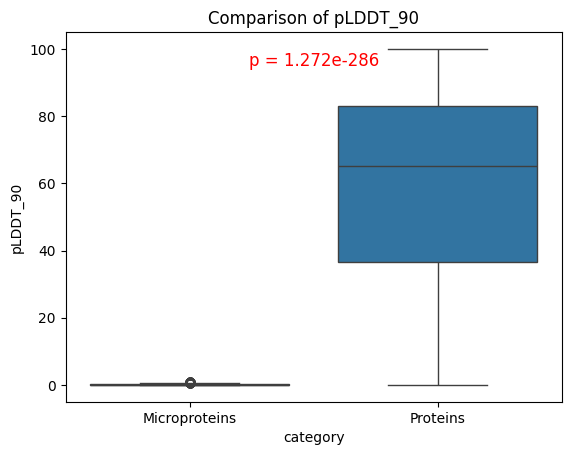

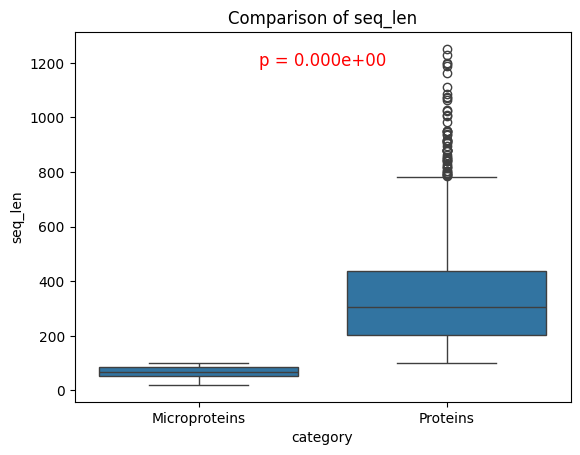

In [ ]:
import polars as pl 
import matplotlib.pyplot as plt 
import seaborn as sns 




microproteins = pl.scan_csv("/Users/simonherman/Documents/Gits/MicroStruct/Uniprot_20_100_structural_descriptors.csv", separator = ";").with_columns(
    category = pl.lit("Microproteins")
).with_columns(

    pLDDT_50 = pl.col("pLDDT_50") * 100, 
    pLDDT_70 = pl.col("pLDDT_70") * 100, 
    pLDDT_90 = pl.col("pLDDT_90") * 100
    
)

proteins = pl.scan_csv("/Users/simonherman/Documents/Gits/MicroStruct/Uniprot_over_100_structural_descriptors.csv", separator = ";").with_columns(
    category = pl.lit("Proteins")
)

lf = pl.concat([microproteins, proteins]).filter(
    pl.int_range(pl.len()).shuffle().over("category") < 1000
)


import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import polars as pl  # Assuming you're using polars

for column in lf.collect_schema().names():
    if column in ["ID", "category"]:
        continue

    data = lf.select([column, "category"]).collect().to_pandas()

    data["category"] = data["category"].astype(str)  

    categories = data["category"].unique()
    if len(categories) != 2:
        continue 

    group1 = data[data["category"] == categories[0]][column]
    group2 = data[data["category"] == categories[1]][column]

    stat, p_value = stats.mannwhitneyu(group1, group2, alternative="two-sided")

    plt.figure()
    ax = sns.boxplot(data=data, x="category", y=column)

    # Annotate p-value
    plt.text(
        x=0.5, y=max(data[column]) * 0.95, 
        s=f"p = {p_value:.3e}", 
        ha='center', fontsize=12, color='red'
    )

    plt.title(f"Comparison of {column}")
    plt.show()




ID,Gyration_Radius,Box_Volume,Contact_Order,mean_pLDDT,pLDDT_50,pLDDT_70,pLDDT_90,seq_len,category
str,f64,f64,f64,f64,f64,f64,f64,i64,str
"""AF-A0A7V3KYI9-F1-model_v4""",16.7293,49441.918,4.614,87.3816,0.961,0.7922,0.6883,77,"""Microproteins"""
"""AF-A0A2P9HIC7-F1-model_v4""",15.3798,48035.0312,11.5731,45.002,0.2568,0.0,0.0,74,"""Microproteins"""
"""AF-A0A0D0BZ55-F1-model_v4""",23.1422,18724.6426,4.8352,71.27,0.98,0.5,0.12,50,"""Microproteins"""
"""AF-A0A455V087-F1-model_v4""",17.3023,48933.9102,6.6757,88.475,0.9762,0.8929,0.6786,84,"""Microproteins"""
"""AF-A0A2E7D547-F1-model_v4""",21.8455,80135.8906,8.2935,68.3133,0.697,0.4848,0.2121,66,"""Microproteins"""
…,…,…,…,…,…,…,…,…,…
"""AF-A0A0V8HDL0-F1-model_v4""",15.524,34754.0234,5.6876,86.4589,0.9341,0.8681,0.5714,91,"""Microproteins"""
"""AF-A0A4Z2HEJ0-F1-model_v4""",28.9318,155027.1719,2.8676,64.5267,0.9398,0.3253,0.0843,83,"""Microproteins"""
"""AF-A0A2J6LE77-F1-model_v4""",14.0493,28474.1699,7.2612,35.0738,0.0,0.0,0.0,94,"""Microproteins"""
